# About:



Self updating dataset. It collects RSS Feeds from BBC News using a Kernel: https://www.kaggle.com/gpreda/bbc-news-rss-feeds.
The Kernel is run with a fixed frequency and the dataset is updated using the output of the Notebook.
Content

BBC News RSS Feeds. The data contains the following columns:

    title
    pubDate
    guid
    link
    description

Co:llection method

Uses requests_html and BeautifulSoup to collect RSS Feeds frm title and description

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from IPython import display
import math
from pprint import pprint
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import statsmodels.api as sm
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from textblob import TextBlob
import warnings
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
# Download nltk corpus (first time only)
nltk.download('all')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from statsmodels.formula.api import ols 
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap, factor_mark
from bokeh.layouts import column

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\aleks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\aleks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\aleks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\aleks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\aleks\AppData\Roaming\nltk_data...
[

In [111]:
#Download nltk corpus 
nltk.download('all')

# Suppress warnings
warnings.simplefilter("ignore") 
!pip install wordcloud 
!pip install textblob 
!pip install seaborn

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\aleks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\aleks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\aleks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\aleks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\aleks\AppData\Roaming\nltk_data...
[

### Importing Dataframe:

In [113]:
df = pd.read_csv('bbc_news.csv')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40958 entries, 0 to 40957
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        40958 non-null  object
 1   pubDate      40958 non-null  object
 2   guid         40958 non-null  object
 3   link         40958 non-null  object
 4   description  40958 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [115]:
df.describe

<bound method NDFrame.describe of                                                    title  \
0      Ukraine: Angry Zelensky vows to punish Russian...   
1      War in Ukraine: Taking cover in a town under a...   
2             Ukraine war 'catastrophic for global food'   
3      Manchester Arena bombing: Saffie Roussos's par...   
4      Ukraine conflict: Oil price soars to highest l...   
...                                                  ...   
40953  Ranger scores as Kettering upset local rivals ...   
40954  Woman assaulted at knifepoint fights off attacker   
40955       More councils hit by pro-Russia cyber attack   
40956  Family unable to grieve after 'hospital nightm...   
40957  The pick-ups 'saving  lives on the front line'...   

                             pubDate  \
0      Mon, 07 Mar 2022 08:01:56 GMT   
1      Sun, 06 Mar 2022 22:49:58 GMT   
2      Mon, 07 Mar 2022 00:14:42 GMT   
3      Mon, 07 Mar 2022 00:05:40 GMT   
4      Mon, 07 Mar 2022 08:15:53 GMT   
...  

In [116]:
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


### Data Cleaning:

In [118]:
df.tail()

,title,pubDate,guid,link,description
40953,Ranger scores as Kettering upset local rivals ...,"Sat, 02 Nov 2024 21:08:32 GMT",https://www.bbc.com/sport/football/videos/cwy5...,https://www.bbc.com/sport/football/videos/cwy5...,Watch highlights as Kettering Town secure a fa...
40954,Woman assaulted at knifepoint fights off attacker,"Sat, 02 Nov 2024 14:50:47 GMT",https://www.bbc.com/news/articles/cn4vjvd771qo#9,https://www.bbc.com/news/articles/cn4vjvd771qo,An investigation has been launched into a seri...
40955,More councils hit by pro-Russia cyber attack,"Sat, 02 Nov 2024 09:11:49 GMT",https://www.bbc.com/news/articles/cly2jyvx55do#9,https://www.bbc.com/news/articles/cly2jyvx55do,The unitary authority says its website is down...
40956,Family unable to grieve after 'hospital nightm...,"Sat, 02 Nov 2024 22:06:02 GMT",https://www.bbc.com/news/articles/c0jwj6ddll8o#9,https://www.bbc.com/news/articles/c0jwj6ddll8o,A 90-year-old woman's family say they were not...
40957,The pick-ups 'saving lives on the front line'...,"Sat, 02 Nov 2024 08:08:30 GMT",https://www.bbc.com/news/articles/cwy1glxe2zxo#9,https://www.bbc.com/news/articles/cwy1glxe2zxo,"Donated trucks, taken in convoy from Scotland ..."


In [119]:
df.columns

Index(['title', 'pubDate', 'guid', 'link', 'description'], dtype='object')

In [120]:
df.isna().sum()

title          0
pubDate        0
guid           0
link           0
description    0
dtype: int64

In [121]:
df.duplicated().sum()

0

### Conclusion: 

There are no null values and no duplicates in this dataframe 

### Fixing time format: 
Converting 'pubDate' column to datetime format for easier date manipulation

In [124]:
df['pubDate '] = pd.to_datetime(df['pubDate'], format='%a, %d %b %Y %H:%M:%S %Z')

In [125]:
df.dtypes

title                       object
pubDate                     object
guid                        object
link                        object
description                 object
pubDate        datetime64[ns, UTC]
dtype: object

In [126]:
df

,title,pubDate,guid,link,description,pubDate
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,2022-03-07 08:01:56+00:00
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",2022-03-06 22:49:58+00:00
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,2022-03-07 00:14:42+00:00
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,2022-03-07 00:05:40+00:00
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,2022-03-07 08:15:53+00:00
...,...,...,...,...,...,...
40953,Ranger scores as Kettering upset local rivals ...,"Sat, 02 Nov 2024 21:08:32 GMT",https://www.bbc.com/sport/football/videos/cwy5...,https://www.bbc.com/sport/football/videos/cwy5...,Watch highlights as Kettering Town secure a fa...,2024-11-02 21:08:32+00:00
40954,Woman assaulted at knifepoint fights off attacker,"Sat, 02 Nov 2024 14:50:47 GMT",https://www.bbc.com/news/articles/cn4vjvd771qo#9,https://www.bbc.com/news/articles/cn4vjvd771qo,An investigation has been launched into a seri...,2024-11-02 14:50:47+00:00
40955,More councils hit by pro-Russia cyber attack,"Sat, 02 Nov 2024 09:11:49 GMT",https://www.bbc.com/news/articles/cly2jyvx55do#9,https://www.bbc.com/news/articles/cly2jyvx55do,The unitary authority says its website is down...,2024-11-02 09:11:49+00:00
40956,Family unable to grieve after 'hospital nightm...,"Sat, 02 Nov 2024 22:06:02 GMT",https://www.bbc.com/news/articles/c0jwj6ddll8o#9,https://www.bbc.com/news/articles/c0jwj6ddll8o,A 90-year-old woman's family say they were not...,2024-11-02 22:06:02+00:00


### Sorting Topics:

Topics are sorted using bag of words and simple functions

In [128]:
def extract_topic(url):
    if "bbc.com" in url or "bbc.co.uk" in url:
        if '/news/' in url:
            parts = url.split('/news/')
            if len(parts) > 1:
                topic_parts = parts[1].split('/')
                return topic_parts[0] if topic_parts else 'other'
        else:
            parts = url.split('bbc.co.uk/') if 'bbc.co.uk' in url else url.split('bbc.com/')
            if len(parts) > 1:
                topic_parts = parts[1].split('/')
                return topic_parts[0] if topic_parts else 'other'
    return 'other'

df['topic'] = df['guid'].apply(extract_topic)

In [129]:
df

,title,pubDate,guid,link,description,pubDate,topic
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,2022-03-07 08:01:56+00:00,world-europe-60638042
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",2022-03-06 22:49:58+00:00,world-europe-60641873
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,2022-03-07 00:14:42+00:00,business-60623941
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,2022-03-07 00:05:40+00:00,uk-60579079
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,2022-03-07 08:15:53+00:00,business-60642786
...,...,...,...,...,...,...,...
40953,Ranger scores as Kettering upset local rivals ...,"Sat, 02 Nov 2024 21:08:32 GMT",https://www.bbc.com/sport/football/videos/cwy5...,https://www.bbc.com/sport/football/videos/cwy5...,Watch highlights as Kettering Town secure a fa...,2024-11-02 21:08:32+00:00,sport
40954,Woman assaulted at knifepoint fights off attacker,"Sat, 02 Nov 2024 14:50:47 GMT",https://www.bbc.com/news/articles/cn4vjvd771qo#9,https://www.bbc.com/news/articles/cn4vjvd771qo,An investigation has been launched into a seri...,2024-11-02 14:50:47+00:00,articles
40955,More councils hit by pro-Russia cyber attack,"Sat, 02 Nov 2024 09:11:49 GMT",https://www.bbc.com/news/articles/cly2jyvx55do#9,https://www.bbc.com/news/articles/cly2jyvx55do,The unitary authority says its website is down...,2024-11-02 09:11:49+00:00,articles
40956,Family unable to grieve after 'hospital nightm...,"Sat, 02 Nov 2024 22:06:02 GMT",https://www.bbc.com/news/articles/c0jwj6ddll8o#9,https://www.bbc.com/news/articles/c0jwj6ddll8o,A 90-year-old woman's family say they were not...,2024-11-02 22:06:02+00:00,articles


In [130]:
df['topic'].value_counts()

topic
sport                             8226
articles                          5663
sounds                             356
videos                             276
iplayer                            126
                                  ... 
science-environment-63955526         1
world-middle-east-63958584           1
uk-england-manchester-63726889       1
health-63910429                      1
business-65311346#3                  1
Name: count, Length: 23623, dtype: int64

In [131]:
df['topic'].value_counts()

topic
sport                             8226
articles                          5663
sounds                             356
videos                             276
iplayer                            126
                                  ... 
science-environment-63955526         1
world-middle-east-63958584           1
uk-england-manchester-63726889       1
health-63910429                      1
business-65311346#3                  1
Name: count, Length: 23623, dtype: int64

In [132]:

# Clean and extract relevant parts from URLs
df['cleaned_links'] = df['guid'].apply(lambda url: ' '.join(url.split('/')[3:]))

# Create a bag-of-words model
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_links'])

# Convert the bag-of-words model to a DataFrame
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum up word counts to find the most common topics
topic_counts = bag_of_words_df.sum().sort_values(ascending=False)

# Display the top common topics
print(topic_counts.head())

# Assign a single word topic based on the most common words
def assign_topic(text):
    for word in topic_counts.index:
        if word in text:
            return word
    return 'other'

df['topic'] = df['cleaned_links'].apply(assign_topic)
df[['guid', 'topic']]


news        32150
uk           9669
world        8383
sport        8232
articles     7152
dtype: int64


,guid,topic
0,https://www.bbc.co.uk/news/world-europe-60638042,news
1,https://www.bbc.co.uk/news/world-europe-60641873,news
2,https://www.bbc.co.uk/news/business-60623941,news
3,https://www.bbc.co.uk/news/uk-60579079,news
4,https://www.bbc.co.uk/news/business-60642786,news
...,...,...
40953,https://www.bbc.com/sport/football/videos/cwy5...,sport
40954,https://www.bbc.com/news/articles/cn4vjvd771qo#9,news
40955,https://www.bbc.com/news/articles/cly2jyvx55do#9,news
40956,https://www.bbc.com/news/articles/c0jwj6ddll8o#9,news


In [133]:
df['topic'].value_counts()

topic
news          32182
sport          8226
sounds          349
play            105
articles         64
weather          21
12                3
politics          2
programmes        2
education         1
10                1
other             1
videos            1
Name: count, dtype: int64

In [134]:
# Extract and clean relevant parts from URLs
def clean_url(url):
    if '/news/' in url:
        return url.split('/news/')[1]
    else:
        return ' '.join(url.split('/')[3:])

df['cleaned_links'] = df['guid'].apply(clean_url)

# Create a bag-of-words model
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_links'])

# Convert the bag-of-words model to a DataFrame
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum up word counts to find the most common topics
topic_counts = bag_of_words_df.sum().sort_values(ascending=False)

# Display the top common topics
print(topic_counts.head())

# Assign a single word topic based on the most common words
def assign_topic(text):
    for word in topic_counts.index:
        if word in text:
            return word
    return 'other'

df['topic'] = df['cleaned_links'].apply(assign_topic)

df[['guid', 'topic']]

uk          9669
world       8383
sport       8232
articles    7152
football    4200
dtype: int64


,guid,topic
0,https://www.bbc.co.uk/news/world-europe-60638042,world
1,https://www.bbc.co.uk/news/world-europe-60641873,world
2,https://www.bbc.co.uk/news/business-60623941,business
3,https://www.bbc.co.uk/news/uk-60579079,uk
4,https://www.bbc.co.uk/news/business-60642786,business
...,...,...
40953,https://www.bbc.com/sport/football/videos/cwy5...,sport
40954,https://www.bbc.com/news/articles/cn4vjvd771qo#9,articles
40955,https://www.bbc.com/news/articles/cly2jyvx55do#9,articles
40956,https://www.bbc.com/news/articles/c0jwj6ddll8o#9,articles


In [135]:

def clean_url(url):
    if '/news/' in url:
        return url.split('/news/')[1]
    else:
        return ' '.join(url.split('/')[3:])

df['cleaned_links'] = df['guid'].apply(clean_url)

# Create a bag-of-words model
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_links'])

# Convert the bag-of-words model to a DataFrame
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum up word counts to find the most common topics
topic_counts = bag_of_words_df.sum().sort_values(ascending=False)

# Display the top common topics
print(topic_counts.head())

# Assign a single word topic based on the most common words with specific conditions
def assign_topic(text):
    if 'sport' in text or 'football' in text:
        return 'sport'
    if '/news/' in text:
        topic_parts = text.split('/news/')[1].split('/')
        return topic_parts[0] if topic_parts else 'other'
    if 'world-' in text:
        topic_parts = text.split('world-')[1].split('/')
        return topic_parts[0] if topic_parts else 'other'
    if 'article' in text:
        return 'article'
    for word in topic_counts.index:
        if word in text:
            return word
    return 'other'

df['topic'] = df['cleaned_links'].apply(assign_topic)

df[['guid', 'topic']]

uk          9669
world       8383
sport       8232
articles    7152
football    4200
dtype: int64


,guid,topic
0,https://www.bbc.co.uk/news/world-europe-60638042,europe-60638042
1,https://www.bbc.co.uk/news/world-europe-60641873,europe-60641873
2,https://www.bbc.co.uk/news/business-60623941,business
3,https://www.bbc.co.uk/news/uk-60579079,uk
4,https://www.bbc.co.uk/news/business-60642786,business
...,...,...
40953,https://www.bbc.com/sport/football/videos/cwy5...,sport
40954,https://www.bbc.com/news/articles/cn4vjvd771qo#9,article
40955,https://www.bbc.com/news/articles/cly2jyvx55do#9,article
40956,https://www.bbc.com/news/articles/c0jwj6ddll8o#9,article


In [136]:
df['topic'].value_counts()

topic
uk                      9669
sport                   8226
article                 5720
business                2644
arts                    1865
                        ... 
asia-china-63805187        1
middle-east-63799854       1
us-canada-63709446         1
63806518                   1
69439938#2                 1
Name: count, Length: 7830, dtype: int64

In [137]:
df = df[df['topic'] != 'article']

In [138]:
df['topic'].value_counts()

topic
uk                      9669
sport                   8226
business                2644
arts                    1865
health                   687
                        ... 
asia-china-63805187        1
middle-east-63799854       1
us-canada-63709446         1
63806518                   1
69439938#2                 1
Name: count, Length: 7829, dtype: int64

In [139]:
df = df[~df['topic'].str.isnumeric()]

In [140]:
df['topic'].value_counts()

topic
uk                        9669
sport                     8226
business                  2644
arts                      1865
health                     687
                          ... 
europe-63933132              1
europe-jersey-63938234       1
africa-63932225              1
europe-63921002              1
69439938#2                   1
Name: count, Length: 7341, dtype: int64

### All foreign news are labeled as "world", and making a backup with regions in case it is required in further analysis

In [142]:
# Function to categorize topics
def categorize_topic(topic):
    if 'europe' in topic:
        return 'europe'
    elif 'us-canada' in topic:
        return 'us-canada'
    elif 'africa' in topic:
        return 'africa'
    elif 'australia' in topic:
        return 'australia'
    elif 'asia' in topic:
        return 'asia'
    elif 'middle-east' in topic:
        return 'middle-east'
    elif 'latin-america' in topic:
        return 'latin-america'
    return topic

# Apply function to create a new category column
df['topic'] = df['topic'].apply(categorize_topic)
df = df[~df['topic'].str.contains(r'\d|#')] 
#df = df[~df['topic'].str.contains('videos|sounds|articles|blogs|pictures|extra|other|magazine')] 
#df.drop(columns=['cleaned_links'], inplace=True) 
#df.drop(columns=['pubDate\t'], inplace=True) 

In [143]:
df['topic'].value_counts()

topic
uk               9669
sport            8226
europe           2649
business         2644
us-canada        2014
arts             1865
middle-east      1113
asia             1081
health            687
blogs             632
science           563
africa            562
technology        430
newsbeat          402
sounds            356
latin-america     281
videos            277
education         271
pictures          198
australia         192
play              125
explainers        100
disability         35
stories            32
weather            21
newsround           3
politics            2
reporters           1
magazine            1
extra               1
other               1
Name: count, dtype: int64

In [144]:
#making a backup just in case with all the location of news sorted
backup_df = df.copy() 

In [145]:
#making sure all the foreign cathegories are listed as "world"
def categorize_topic(topic):
    if 'europe' in topic:
        return 'world'
    elif 'us-canada' in topic:
        return 'world'
    elif 'africa' in topic:
        return 'world'
    elif 'australia' in topic:
        return 'world'
    elif 'asia' in topic:
        return 'world'
    elif 'middle-east' in topic:
        return 'world'
    elif 'latin-america' in topic:
        return 'world'
    return topic 
df['topic'] = df['topic'].apply(categorize_topic)

In [146]:
df['topic'].value_counts()

topic
uk            9669
sport         8226
world         7892
business      2644
arts          1865
health         687
blogs          632
science        563
technology     430
newsbeat       402
sounds         356
videos         277
education      271
pictures       198
play           125
explainers     100
disability      35
stories         32
weather         21
newsround        3
politics         2
reporters        1
magazine         1
extra            1
other            1
Name: count, dtype: int64

### Discarding irrelevant data:

In [148]:
df = df[~df['topic'].str.contains('videos|sounds|articles|blogs|pictures|extra|other|magazine')]

In [149]:
topic_count = df['topic'].value_counts()

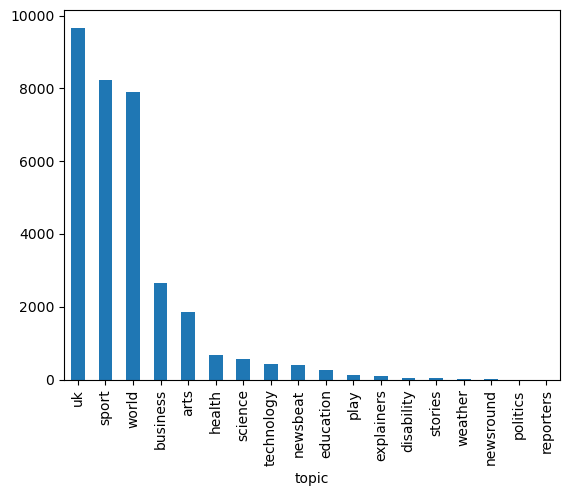

In [150]:
topic_count.plot(kind="bar")
plt.show()

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32968 entries, 0 to 40953
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   title          32968 non-null  object             
 1   pubDate        32968 non-null  object             
 2   guid           32968 non-null  object             
 3   link           32968 non-null  object             
 4   description    32968 non-null  object             
 5   pubDate        32968 non-null  datetime64[ns, UTC]
 6   topic          32968 non-null  object             
 7   cleaned_links  32968 non-null  object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 2.3+ MB


### Applyng NLP 

In [153]:
#Initiating
bagofwords = CountVectorizer(
    stop_words="english",
    min_df=50,
    max_df=0.2,
    max_features=1000,
    ngram_range=(1, 3)
)

# Fittting
bagofwords.fit(df["description"])

# Transforming
transformed = bagofwords.transform(df["description"])
transformed_df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=transformed.toarray())

In [154]:

# setting the date as index for both data frames
df["pubDate"] = pd.to_datetime(df["pubDate"])
df = df.set_index("pubDate")

transformed_df = transformed_df.set_index(df.index)


In [155]:
pd.get_dummies(df[["description"]])

,"description_""A government that's barely begun is confronting questions about its end,"" our political editor writes.","description_""A setback"" is how Arne Slot describes his first defeat as Liverpool manager, while pundit Chris Sutton declares ""the honeymoon is over"".","description_""Absolutely horrific"" stories found by damning report into discrimination in cricket show game's culture is ""rotten"", says report chair.","description_""Alice"" speaks exclusively to the BBC after her successful lawsuit against Omegle forced it offline.","description_""All the work you could want, but there isn't anywhere to live,"" say those struggling on the island.","description_""Another tragic loss of a beautiful soul,"" Charlatans singer Tim Burgess says about the keyboardist.","description_""Arrogant"", ""discreet"" - Lucy Williamson visits the apartment block where the brothers first settled.","description_""Because it is so hauntingly similar to what happened at Sandy Hook School, it hit closer to home.""","description_""Confidential"" documents obtained by the BBC show how Iran is dealing with women violating its dress code.","description_""Copy and paste"" conspiracies that spread during the pandemic are being pushed for monkeypox.",...,description_Zoe Beaty felt ignored when she reported a flasher - but later learnt the man was a serial offender.,description_Zoe Conway sets out what you should know about the rail strike and other strike action this week.,description_Zoe Kleinman shares her thoughts on Apple's Vision Pro mixed-reality device after its big launch.,description_Zoe and Ben Sullivan explain how they've been cutting costs as the family’s energy and fuel bills double.,description_Zookeepers caught on camera the moment the dusky pademelon first peeked out of its mum's pouch.,description_Zookeepers found the new baby strolling around in the morning after he was born overnight.,description_iPhone users in the EU will soon be able to download apps from places other than the App Store.,"description_£3.7bn is expected to be spent on Tuesday, research suggests, but that is still down on 2022.","description_“They are always after women” rather than tackling Afghanistan’s many problems, one activist told the BBC.",description_“We won’t move!” – The first ‘forced removals’ of apartheid-era South Africa
pubDate,,,,,,,,,,,,,,,,,,,,,
2022-03-07 08:01:56,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-03-06 22:49:58,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-03-07 00:14:42,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-03-07 00:05:40,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-03-07 08:15:53,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-02 20:31:52,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-11-02 20:13:59,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-11-02 21:51:06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [156]:
pd.get_dummies(df[['topic']])

,topic_arts,topic_business,topic_disability,topic_education,topic_explainers,topic_health,topic_newsbeat,topic_newsround,topic_play,topic_politics,topic_reporters,topic_science,topic_sport,topic_stories,topic_technology,topic_uk,topic_weather,topic_world
pubDate,,,,,,,,,,,,,,,,,,
2022-03-07 08:01:56,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2022-03-06 22:49:58,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2022-03-07 00:14:42,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-03-07 00:05:40,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2022-03-07 08:15:53,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-02 20:31:52,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2024-11-02 20:13:59,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2024-11-02 21:51:06,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [157]:
df['topic'].nunique()

18

In [158]:
df['description'].nunique()

30690

In [159]:
transformed_df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=transformed.toarray())
transformed_df

,000,10,100,11,12,13,14,15,16,17,...,worst,writer,writes,year,year old,years,years ago,york,young,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
word_counts = transformed_df.sum(axis=0).sort_values(ascending=False)

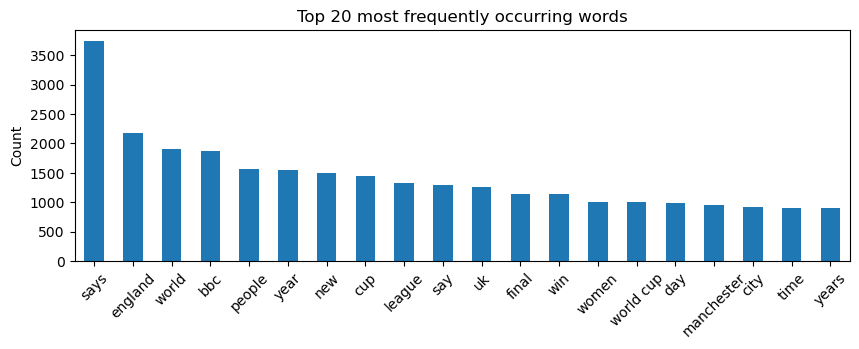

In [161]:
import matplotlib.pyplot as plt

word_counts.head(20).plot(kind="bar", figsize=(10, 3), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [162]:
document_length = transformed_df.sum(axis=1)

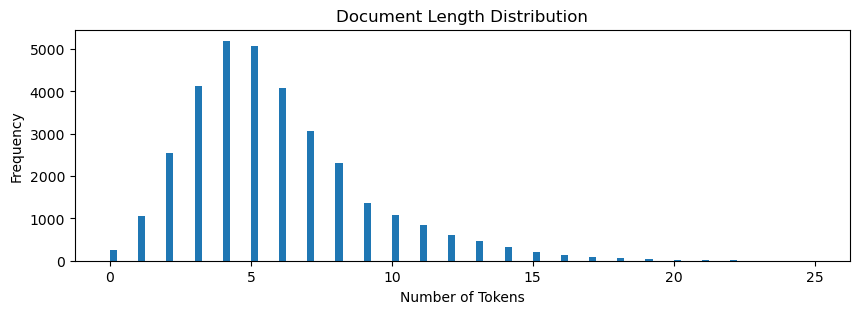

In [163]:
document_length.plot(kind="hist", bins=100, title="Document Length Distribution", figsize=(10, 3))
plt.xlabel("Number of Tokens")
plt.show()

In [164]:
document_length.describe()

count    32968.000000
mean         5.736593
std          3.176512
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         25.000000
dtype: float64

In [165]:
transformed

<32968x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 187674 stored elements in Compressed Sparse Row format>

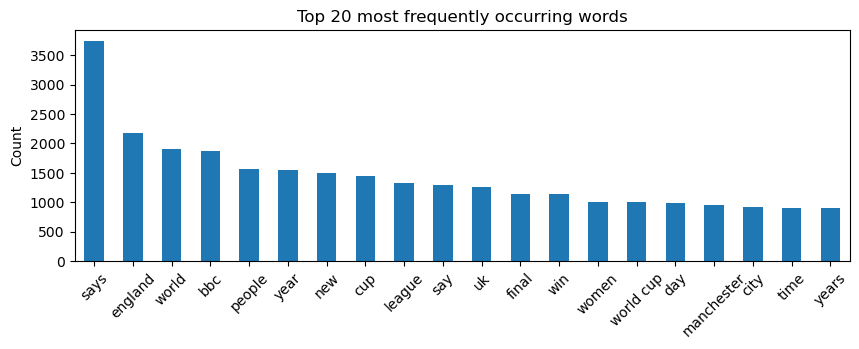

In [166]:
transformed_df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=transformed.toarray())

word_counts = transformed_df.sum(axis=0).sort_values(ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(10, 3), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [167]:
bagofwords = CountVectorizer(
    stop_words="english",
    min_df=50,
    max_df=0.2,
    max_features=1000
) 

In [168]:
bagofwords.fit(df['description'])

CountVectorizer(max_df=0.2, max_features=1000, min_df=50, stop_words='english')

In [169]:
transformed = bagofwords.transform(df['description'])
transformed

<32968x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 181421 stored elements in Compressed Sparse Row format>

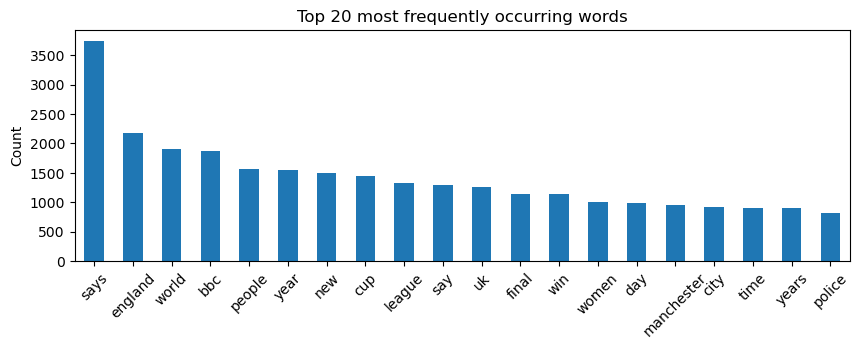

In [170]:
transformed_df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=transformed.toarray())

word_counts = transformed_df.sum(axis=0).sort_values(ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(10, 3), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

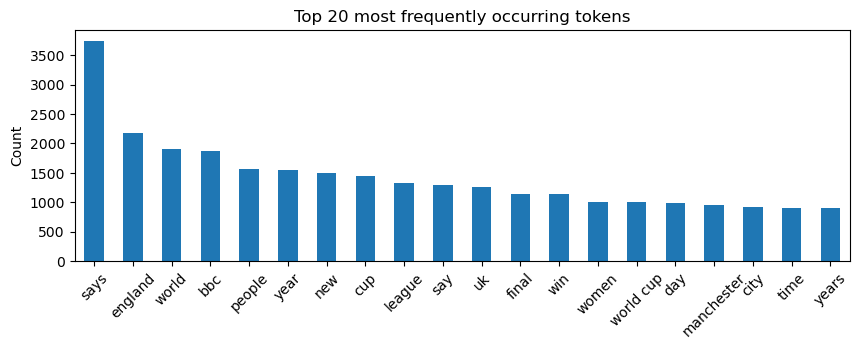

In [171]:
bagofwords = CountVectorizer(
    stop_words="english",
    min_df=50,
    max_df=0.2,
    max_features=1000,
    ngram_range=(1, 3)
)

# 2. Fit
bagofwords.fit(df['description'])
 
# 3. Transform
transformed = bagofwords.transform(df['description'])
transformed 
transformed_df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=transformed.toarray())

word_counts = transformed_df.sum(axis=0).sort_values(ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(10, 3), legend=False)
plt.title("Top 20 most frequently occurring tokens")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### NLTK 
NLTK seemed like an easier way to solve this
 Initially, I implemented a Bag-of-Words model for text processing, which involves tokenizing the text and converting it into numerical representations. 
 While this method was useful for creating text features for machine learning models, it involved multiple steps of tokenization, vectorization, and managing sparse matrices.
I switched to using NLTK's VADER sentiment analyzer.
NLTK provides a comprehensive toolkit for text processing, and VADER is particularly effective for analyzing sentiment in English text.
This transition allowed for more straightforward and efficient sentiment analysis without the need for extensive preprocessing.

In [173]:
# Defining STOPWORDS
STOPWORDS = set(stopwords.words('english'))


def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

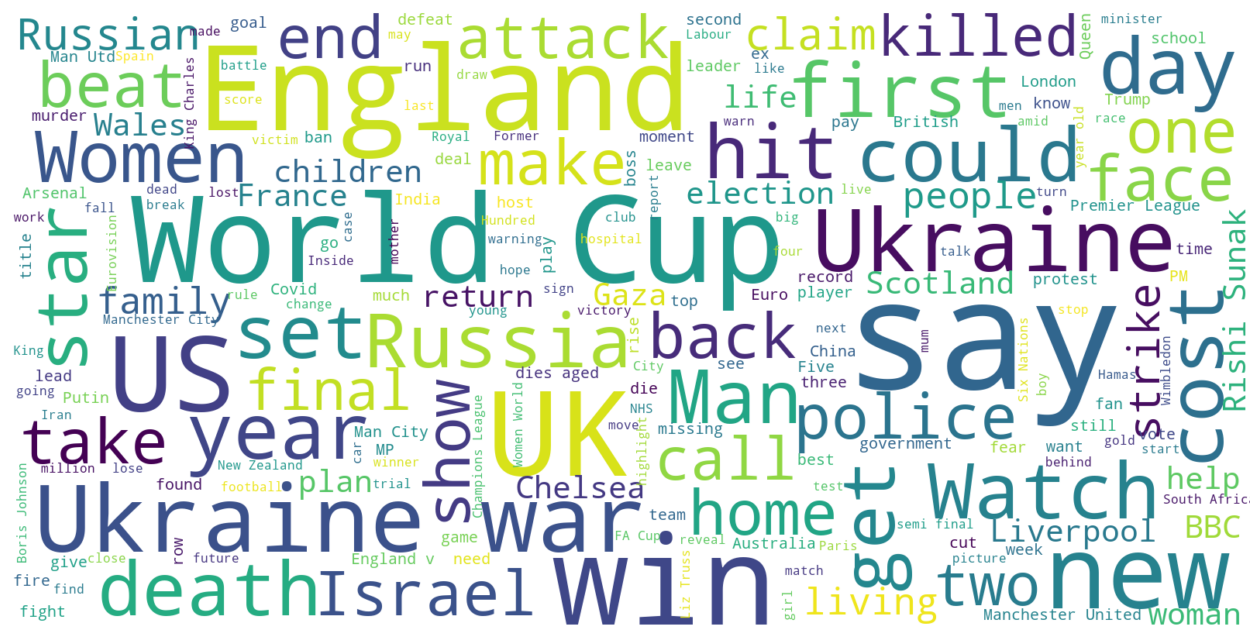

In [174]:
show_wordcloud(df['title'], title = '', mask=None)

### Sentiment Analysis: 

In [176]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [177]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

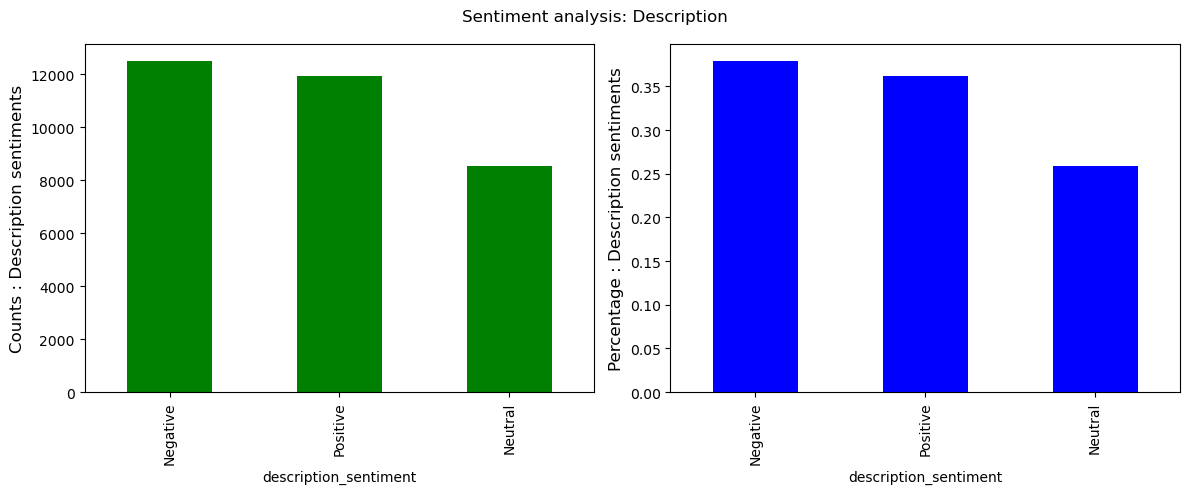

In [178]:
df['description_sentiment'] = df['description'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'description_sentiment', 'Description')

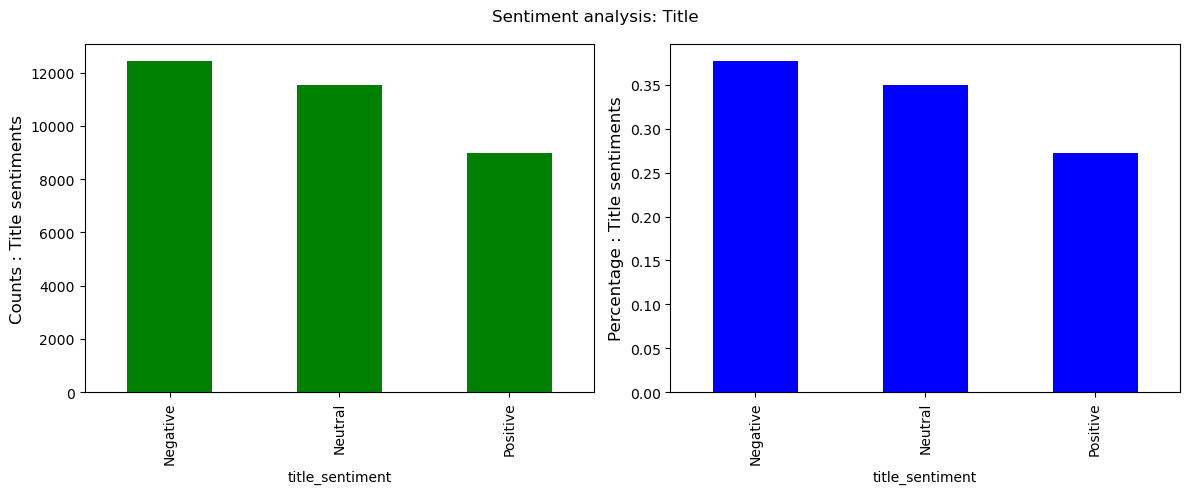

In [179]:
df['title_sentiment'] = df['title'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'title_sentiment', 'Title')

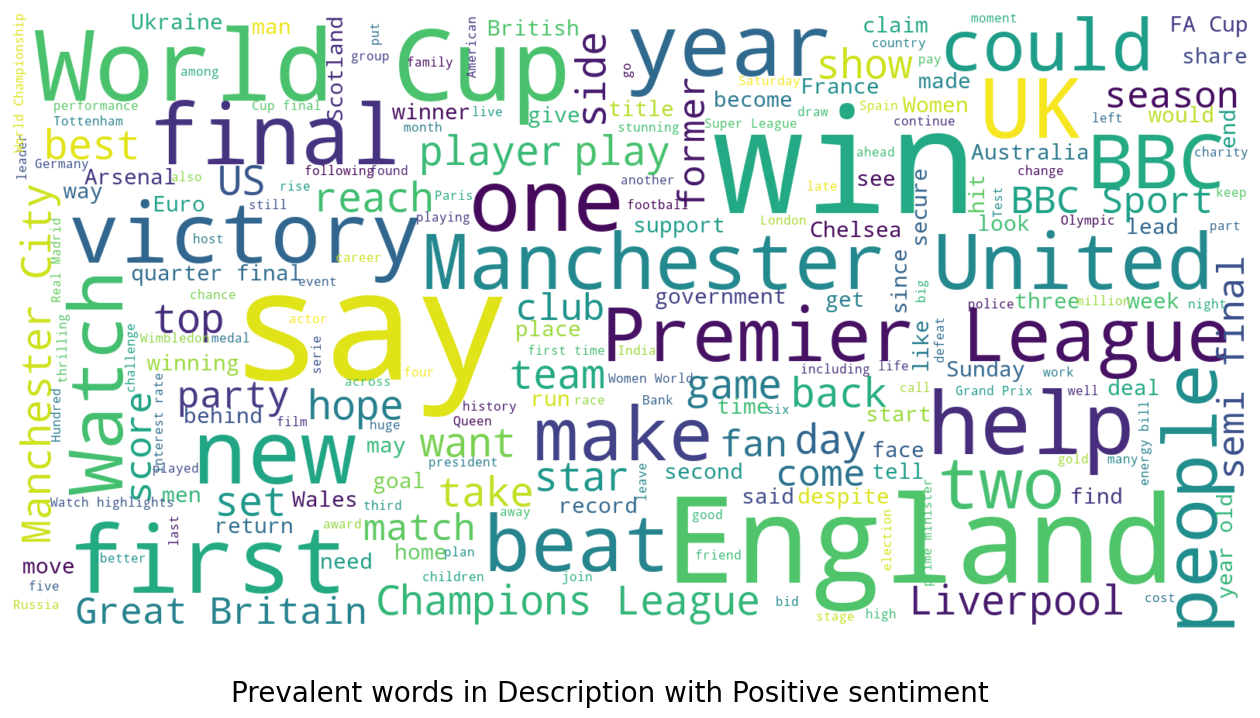

In [180]:
show_wordcloud(df.loc[df['description_sentiment']=="Positive", 'description'], title = 'Prevalent words in Description with Positive sentiment', mask=None)

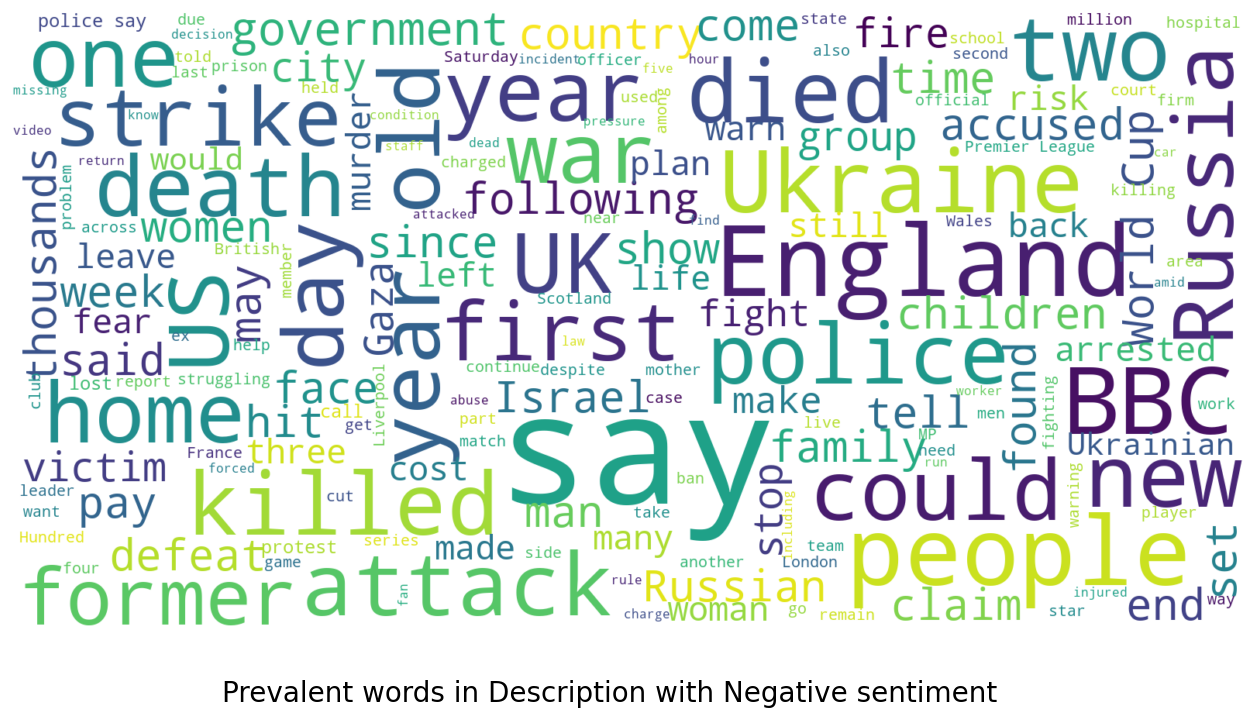

In [181]:
show_wordcloud(df.loc[df['description_sentiment']=="Negative", 'description'], title = 'Prevalent words in Description with Negative sentiment', mask=None)

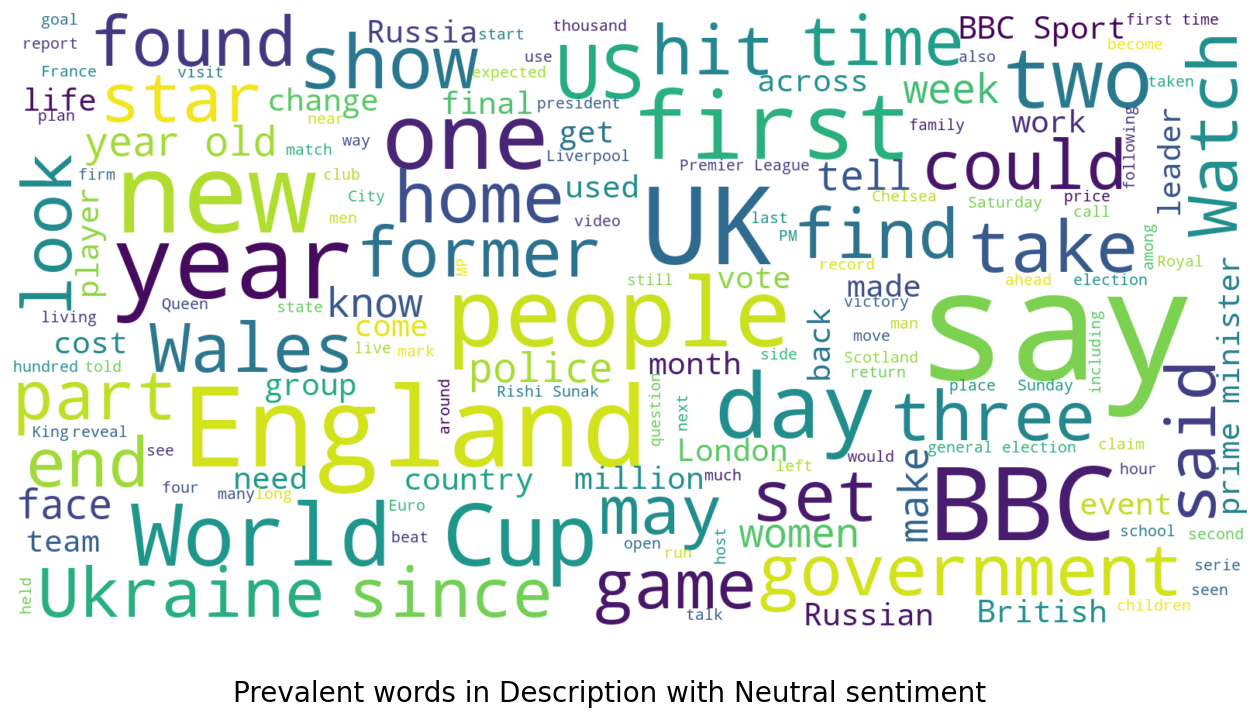

In [182]:
show_wordcloud(df.loc[df['description_sentiment']=="Neutral", 'description'], title = 'Prevalent words in Description with Neutral sentiment', mask=None)

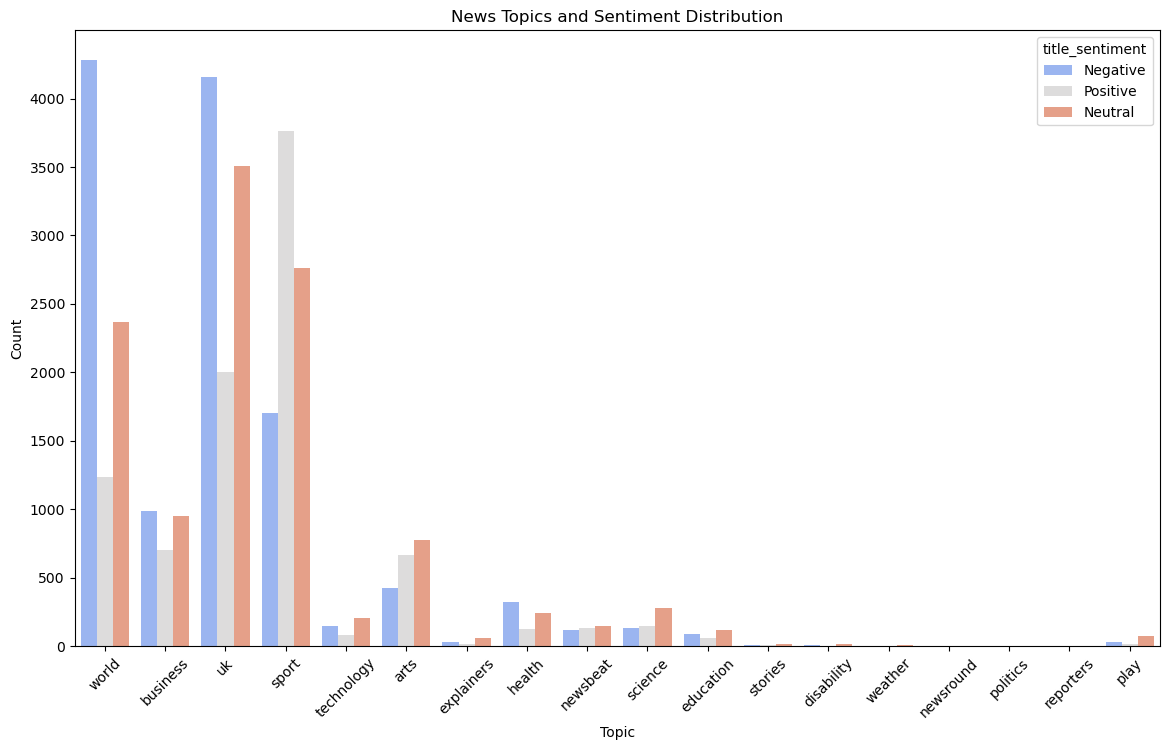

In [183]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x=df['topic'], hue=df['title_sentiment'], palette='coolwarm')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('News Topics and Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()

### Average Sentiment per topic:

In [185]:
def topicsMode(df):
   
    topics = df['topic'].unique()

    for topic in topics:
        topic_data = df[df['topic'] == topic]
        
        # Find the mode for description sentiment
        description_mode = topic_data['description_sentiment'].mode()[0]
        
        # Find the mode for title sentiment
        title_mode = topic_data['title_sentiment'].mode()[0]
         
        # Print results
        print(f"Topic: {topic}")
        print(f"   Average Description Sentiment: {description_mode}")
        print(f"  Average Title Sentiment: {title_mode}\n")

In [186]:
topicsMode(df)

Topic: world
   Average Description Sentiment: Negative
  Average Title Sentiment: Negative

Topic: business
   Average Description Sentiment: Negative
  Average Title Sentiment: Negative

Topic: uk
   Average Description Sentiment: Negative
  Average Title Sentiment: Negative

Topic: sport
   Average Description Sentiment: Positive
  Average Title Sentiment: Positive

Topic: technology
   Average Description Sentiment: Neutral
  Average Title Sentiment: Neutral

Topic: arts
   Average Description Sentiment: Positive
  Average Title Sentiment: Neutral

Topic: explainers
   Average Description Sentiment: Negative
  Average Title Sentiment: Neutral

Topic: health
   Average Description Sentiment: Negative
  Average Title Sentiment: Negative

Topic: newsbeat
   Average Description Sentiment: Positive
  Average Title Sentiment: Neutral

Topic: science
   Average Description Sentiment: Positive
  Average Title Sentiment: Neutral

Topic: education
   Average Description Sentiment: Neutral
  

## Potential clickbaits: 
News where title sentiment and description sentiment do not match are treated as a potential clickbait. A further analysis is required 

In [188]:
mismatched_sentiments = df[df['title_sentiment'] != df['description_sentiment']]

# Display the results
mismatched_sentiments

,title,guid,link,description,pubDate,topic,cleaned_links,description_sentiment,title_sentiment
pubDate,,,,,,,,,
2022-03-07 00:05:40,Manchester Arena bombing: Saffie Roussos's par...,https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,2022-03-07 00:05:40+00:00,uk,uk-60579079,Negative,Positive
2022-03-07 08:15:53,Ukraine conflict: Oil price soars to highest l...,https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,2022-03-07 08:15:53+00:00,business,business-60642786,Positive,Negative
2022-03-07 08:33:29,Ukraine war: PM to hold talks with world leade...,https://www.bbc.co.uk/news/uk-60642926,https://www.bbc.co.uk/news/uk-60642926?at_medi...,Boris Johnson is to meet the Canadian and Dutc...,2022-03-07 08:33:29+00:00,uk,uk-60642926,Neutral,Negative
2022-03-07 08:09:21,Ukraine war: UK grants 50 Ukrainian refugee vi...,https://www.bbc.co.uk/news/uk-60640460,https://www.bbc.co.uk/news/uk-60640460?at_medi...,"The home secretary says she is ""surging capaci...",2022-03-07 08:09:21+00:00,uk,uk-60640460,Positive,Negative
2022-03-07 00:11:59,TikTok limits services as Netflix pulls out of...,https://www.bbc.co.uk/news/business-60641988,https://www.bbc.co.uk/news/business-60641988?a...,TikTok suspends live streaming and new content...,2022-03-07 00:11:59+00:00,business,business-60641988,Negative,Neutral
...,...,...,...,...,...,...,...,...,...
2024-11-02 20:31:52,'A long way back now' - what is going wrong at...,https://www.bbc.com/sport/football/articles/c6...,https://www.bbc.com/sport/football/articles/c6...,Tipped by many to take the next step and end t...,2024-11-02 20:31:52+00:00,sport,sport football articles c629xq813peo#8,Positive,Negative
2024-11-02 20:13:59,'We couldn't handle Bournemouth' - how Man Cit...,https://www.bbc.com/sport/football/articles/cq...,https://www.bbc.com/sport/football/articles/cq...,Manchester City's 32-game unbeaten run in the ...,2024-11-02 20:13:59+00:00,sport,sport football articles cqlr6y9g976o#8,Positive,Neutral
2024-11-02 21:51:06,Sao Paulo GP qualifying moved to Sunday after ...,https://www.bbc.com/sport/formula1/articles/cd...,https://www.bbc.com/sport/formula1/articles/cd...,Qualifying at the Sao Paulo Grand Prix is post...,2024-11-02 21:51:06+00:00,sport,sport formula1 articles cdd0ey1v5j9o#8,Positive,Neutral


In [189]:
mismatched_sentiments.describe

<bound method NDFrame.describe of                                                                  title  \
pubDate                                                                  
2022-03-07 00:05:40  Manchester Arena bombing: Saffie Roussos's par...   
2022-03-07 08:15:53  Ukraine conflict: Oil price soars to highest l...   
2022-03-07 08:33:29  Ukraine war: PM to hold talks with world leade...   
2022-03-07 08:09:21  Ukraine war: UK grants 50 Ukrainian refugee vi...   
2022-03-07 00:11:59  TikTok limits services as Netflix pulls out of...   
...                                                                ...   
2024-11-02 20:31:52  'A long way back now' - what is going wrong at...   
2024-11-02 20:13:59  'We couldn't handle Bournemouth' - how Man Cit...   
2024-11-02 21:51:06  Sao Paulo GP qualifying moved to Sunday after ...   
2024-11-02 22:01:46  Celtic slip into their 'A-game' as Aberdeen ge...   
2024-11-02 21:08:32  Ranger scores as Kettering upset local rivals ...   

   

In [190]:
df.head()

,title,guid,link,description,pubDate,topic,cleaned_links,description_sentiment,title_sentiment
pubDate,,,,,,,,,
2022-03-07 08:01:56,Ukraine: Angry Zelensky vows to punish Russian...,https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,2022-03-07 08:01:56+00:00,world,world-europe-60638042,Negative,Negative
2022-03-06 22:49:58,War in Ukraine: Taking cover in a town under a...,https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",2022-03-06 22:49:58+00:00,world,world-europe-60641873,Negative,Negative
2022-03-07 00:14:42,Ukraine war 'catastrophic for global food',https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,2022-03-07 00:14:42+00:00,business,business-60623941,Negative,Negative
2022-03-07 00:05:40,Manchester Arena bombing: Saffie Roussos's par...,https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,2022-03-07 00:05:40+00:00,uk,uk-60579079,Negative,Positive
2022-03-07 08:15:53,Ukraine conflict: Oil price soars to highest l...,https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,2022-03-07 08:15:53+00:00,business,business-60642786,Positive,Negative


## Assumption: there is correleation between length of the news title and title sentiment

In [192]:
# Mapping sentiment to numerical values
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['description_sentiment_numeric'] = df['description_sentiment'].map(sentiment_mapping)
df['title_sentiment_numeric'] = df['title_sentiment'].map(sentiment_mapping)

# Example numerical feature for regression
df['title_length'] = df['title'].apply(len)

# Independent variable (X) and dependent variable (Y)
X = df['title_length']
Y = df['title_sentiment_numeric']

# Adding a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(Y, X).fit()

# Summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     title_sentiment_numeric   R-squared:                       0.011
Model:                                 OLS   Adj. R-squared:                  0.010
Method:                      Least Squares   F-statistic:                     350.0
Date:                     Mon, 04 Nov 2024   Prob (F-statistic):           1.05e-77
Time:                             12:45:49   Log-Likelihood:                -39218.
No. Observations:                    32968   AIC:                         7.844e+04
Df Residuals:                        32966   BIC:                         7.846e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4677      0.020    -23.566      0.000      -0.507      -0.429
title_length     0.0060      0.000     18.710      0.000       0.005       0.007
==============================================================================
Omnibus:                   316385.683   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2821.200
Skew:                           0.162   Prob(JB):                         0.00
Kurtosis:                       1.604   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
# Mapping sentiment to binary values: Positive = 1, Neutral/Negative = 0
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': 0}
df['description_sentiment_binary'] = df['description_sentiment'].map(sentiment_mapping)
df['title_sentiment_binary'] = df['title_sentiment'].map(sentiment_mapping)



# Independent variable (X) and dependent variable (Y)
X = df[['title_length']]
Y = df['title_sentiment_binary']

# Adding a constant to the independent variable
X = sm.add_constant(X)

# Performing the logistic regression
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.572622
         Iterations 5
                             Logit Regression Results                             
Dep. Variable:     title_sentiment_binary   No. Observations:                32968
Model:                              Logit   Df Residuals:                    32966
Method:                               MLE   Df Model:                            1
Date:                    Mon, 04 Nov 2024   Pseudo R-squ.:                 0.02189
Time:                            12:45:49   Log-Likelihood:                -18878.
converged:                           True   LL-Null:                       -19301.
Covariance Type:                nonrobust   LLR p-value:                8.642e-186
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.5844      0.058    -44.770      0.000      -2.698    

### Conclusion:
DataFrame contains various news articles with fields such as title, guid, link, description, topic, description_sentiment, title_sentiment, and pubDate. The regression models were used to analyze the relationship between the length of the news titles and the sentiment.

Logistic Regression Results:
Dependent Variable: title_sentiment_binary (positive sentiment as 1, non-positive as 0)

No. Observations: 32,816

Pseudo R-squared: 0.02223

Log-Likelihood: -18,756

Coefficients:

const: -2.6013 (highly significant with p < 0.000)

title_length: 0.0262 (highly significant with p < 0.000)

Constant (const): The intercept value is negative, suggesting that with a title length of zero (hypothetically), the log-odds of the title sentiment being positive is quite low.

Title Length Coefficient: A positive coefficient (0.0262) for title length indicates that longer titles are associated with a higher likelihood of having a positive sentiment. For every unit increase in title length, the log-odds of the title being positive increase by approximately 0.0262.

OLS Regression Results:
Dependent Variable: title_sentiment_numeric (positive: 1, neutral: 0, negative: -1)

R-squared: 0.011

Adj. R-squared: 0.011

F-statistic: 356.1 (p < 0.000)

Log-Likelihood: -39,021

Coefficients:

const: -0.4730 (highly significant with p < 0.000)

title_length: 0.0061 (highly significant with p < 0.000)


Constant (const): The intercept here is also negative, indicating that shorter titles tend to have a slightly negative sentiment on average.

Title Length Coefficient: The positive coefficient (0.0061) for title length suggests that longer titles are slightly more associated with positive sentiment. However, the very low R-squared value (0.011) means that title length explains only a tiny fraction of the variance in sentiment.

**Summary:**
While both logistic and OLS regressions show that longer titles have a positive relationship with positive sentiment, the explanatory power is quite low (indicated by the low R-squared values). This suggests that while title length has a statistically significant effect, other factors likely play a much larger role in determining sentiment.

### Assumption: certain keywords correlate with certain type of sentiment


In [196]:
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': 0}
df['description_sentiment_binary'] = df['description_sentiment'].map(sentiment_mapping)

# Define keywords
keywords = ['war', 'conflict', 'economy', 'health', 'victory', 'defeat']

# Create binary indicators for the presence of keywords
for word in keywords:
    df[f'contains_{word}'] = df['description'].apply(lambda x: 1 if word in x.lower() else 0)

# Independent variable (X) and dependent variable (Y)
X = df[[f'contains_{word}' for word in keywords]]
Y = df['description_sentiment_binary']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the logistic regression
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Summary of the regression
result.summary()

Optimization terminated successfully.
         Current function value: 0.648447
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     description_sentiment_binary   No. Observations:                32968
Model:                                    Logit   Df Residuals:                    32961
Method:                                     MLE   Df Model:                            6
Date:                          Mon, 04 Nov 2024   Pseudo R-squ.:                0.008754
Time:                                  12:45:50   Log-Likelihood:                -21378.
converged:                                 True   LL-Null:                       -21567.
Covariance Type:                      nonrobust   LLR p-value:                 1.812e-78
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5966      0.012    -49.304      0.000      -0.620      -0.573
contains_war         -0.0491      0.051     -0.959      0.337      -0.150       0.051
contains_conflict    -0.5157      0.241     -2.143      0.032      -0.987      -0.044
contains_economy      0.2080      0.177      1.174      0.240      -0.139       0.555
contains_health       0.2994      0.114      2.632      0.008       0.076       0.522
contains_victory      1.5912      0.091     17.459      0.000       1.413       1.770
contains_defeat      -0.3421      0.116     -2.957      0.003      -0.569      -0.115
=====================================================================================
"""

### Conclusion:
Insights: The model suggests that words like "victory" and "health" strongly correlate with positive sentiment in descriptions, whereas words like "conflict" and "defeat" correlate negatively.

Model Fit: The low Pseudo R-squared value indicates that while some predictors are significant, the overall model explains only a small fraction of the sentiment variance. It might be beneficial to include more features or explore other models to better capture the sentiment dynamics.

Predicted label for single input: [1]
All predictions: [1 1 0 ... 2 2 2]


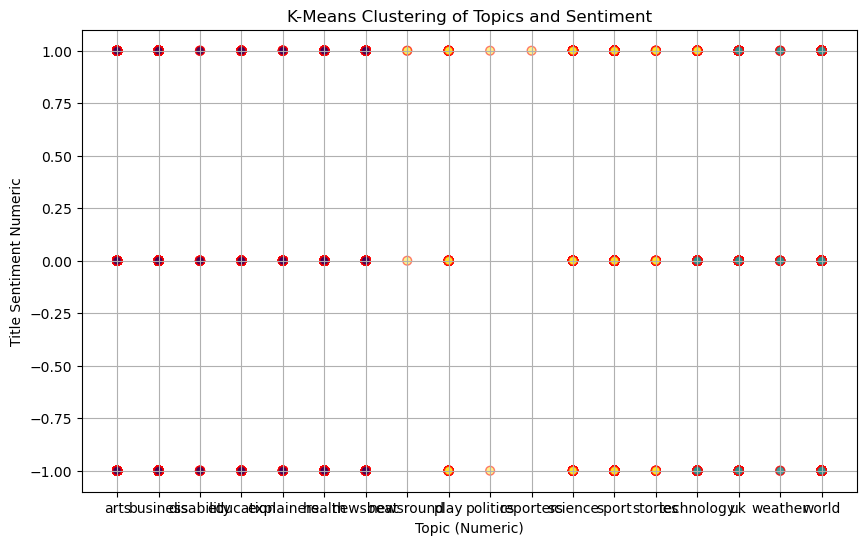

In [198]:
le = LabelEncoder()
df['topic_numeric'] = le.fit_transform(df['topic'])

# Select features for clustering
X = df[['topic_numeric', 'title_sentiment_numeric']]

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(X)

# Predicting a single input
#predicted_label = model.predict([[le.transform(['uk'])['world'], 1]])  # Example input

predicted_label = model.predict([[le.transform(['uk'])[0], 1]])

# Prediction on the entire data
all_predictions = model.predict(X)

# Printing Predictions
print("Predicted label for single input:", predicted_label)
print("All predictions:", all_predictions)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X['topic_numeric'], X['title_sentiment_numeric'], 
            c=all_predictions, edgecolor='red', s=40, alpha=0.5)
plt.title("K-Means Clustering of Topics and Sentiment")
plt.xlabel("Topic (Numeric)")
plt.ylabel("Title Sentiment Numeric")
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_)  # Label the x-axis with original topic names
plt.grid()
plt.show()

Predicted label for single input: [1]
All predictions: [1 1 0 ... 2 2 2]


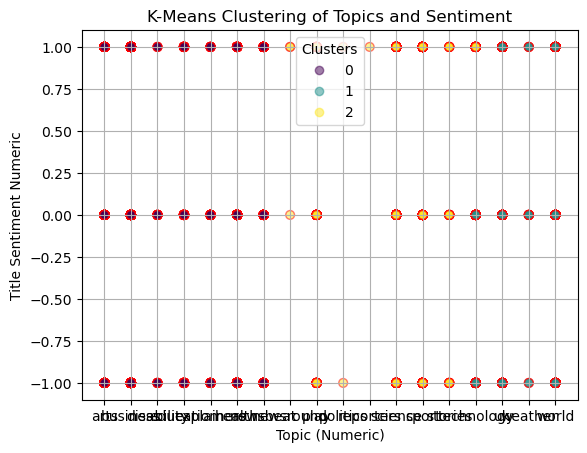

In [199]:
# Ensure reproducibility
np.random.seed(42)

# Map sentiments to numeric values
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['title_sentiment_numeric'] = df['title_sentiment'].map(sentiment_mapping)

# Convert categorical 'topic' to numerical values
le = LabelEncoder()
df['topic_numeric'] = le.fit_transform(df['topic'])

# Select features for clustering
X = df[['topic_numeric', 'title_sentiment_numeric']]

# Declaring Model
model = KMeans(n_clusters=3, random_state=42)  # Added random_state for reproducibility

# Fitting Model
model.fit(X)

# Predicting a single input
predicted_label = model.predict([[le.transform(['world'])[0], 1]])  # Example input for 'world'

# Prediction on the entire data
all_predictions = model.predict(X)

# Printing Predictions
print("Predicted label for single input:", predicted_label)
print("All predictions:", all_predictions)

# Plotting the results
#plt.figure(figsize=(height=800, width=1200))
scatter = plt.scatter(X['topic_numeric'], X['title_sentiment_numeric'],
                      c=all_predictions, edgecolor='red', s=40, alpha=0.5)

# Create a legend for the clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
#plt.add_artist(legend1)

# Formatting the plot
plt.title("K-Means Clustering of Topics and Sentiment")
plt.xlabel("Topic (Numeric)")
plt.ylabel("Title Sentiment Numeric")
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_)  # Label the x-axis with original topic names
plt.grid() 
plt.show()


K-Means clustering effectively grouped the topics and sentiments into distinct clusters, revealing patterns in your data. The algorithm assigned the example input to cluster 2, showcasing how it can differentiate between varying sentiments within the same topic.

The model predominantly predicts the input as label 1, indicating a strong classification capability, despite the presence of other labels in the overall predictions.

### Sentiment change over time in diffrenet topics: 

In [203]:
TOPICS = sorted(df['topic'].unique())
MARKERS = ['hex', 'circle_x', 'triangle', 'square', 'inverted_triangle']   


le = LabelEncoder()
df['topic_numeric'] = le.fit_transform(df['topic'])


plots = []
for topic in TOPICS:
    df_filtered = df[df['topic'] == topic]
    if df_filtered.empty:
        continue 

    source = ColumnDataSource(df_filtered)

    p = figure(x_axis_type='datetime', title=f'Sentiment Over Time for {topic.title()}', height=400, width=800)
    p.xaxis.axis_label = 'Date'
    p.yaxis.axis_label = 'Sentiment'

    p.scatter(x='pubDate', y='title_sentiment_numeric', source=source, size=10,
              marker=factor_mark('topic', MARKERS, TOPICS),
              color=factor_cmap('topic', 'Category10_3', TOPICS), fill_alpha=0.6)

    hover = HoverTool()
    hover.tooltips = [("Date", "@pubDate{%F}"), ("Title Sentiment", "@title_sentiment_numeric"), ("Description Sentiment", "@description_sentiment_numeric"), ("Topic", "@topic")]
    hover.formatters = {'@pubDate': 'datetime'}
    p.add_tools(hover)

    p.legend.location = "top_left"
    p.legend.title = "Topic"

    plots.append(p)


output_file("sentiment_over_time_each_topic.html")
show(column(*plots))